数据初始维度： (20, 60, 4)
数据调整后维度： (60, 4, 20)
数据标准化后维度： (120, 120, 120)
i,j,k: 42 58 64
i,j,k: 42 61 64
i,j,k: 43 58 63
i,j,k: 43 61 63
i,j,k: 67 58 58
i,j,k: 67 58 59
i,j,k: 67 61 58
i,j,k: 67 61 59
i,j,k: 68 58 60
i,j,k: 68 58 61
i,j,k: 68 61 60
i,j,k: 68 61 61
i,j,k: 69 58 62
i,j,k: 69 58 63
i,j,k: 69 61 62
i,j,k: 69 61 63
i,j,k: 70 58 64
i,j,k: 70 58 65
i,j,k: 70 61 64
i,j,k: 70 61 65
i,j,k: 71 58 66
i,j,k: 71 58 67
i,j,k: 71 61 66
i,j,k: 71 61 67
i,j,k: 72 58 68
i,j,k: 72 61 68
i,j,k: 73 58 68
i,j,k: 73 61 68
i,j,k: 74 58 67
i,j,k: 74 61 67
i,j,k: 75 58 67
i,j,k: 75 61 67
i,j,k: 76 58 66
i,j,k: 76 61 66
i,j,k: 77 58 66
i,j,k: 77 61 66
i,j,k: 78 58 65
i,j,k: 78 61 65
i,j,k: 79 58 65
i,j,k: 79 61 65
i,j,k: 80 58 64
i,j,k: 80 61 64
i,j,k: 81 58 64
i,j,k: 81 61 64
i,j,k: 82 58 63
i,j,k: 82 61 63
遍历了： 1643032 次
共有 752 个非零元素
共有 14 个缺陷点
search_list: [[[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[41. 58. 64.]
  [43. 58. 64.]
  [42. 57. 64.]

{(30, 58, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9835d6dc0>,
 (30, 58, 51): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9835dae20>,
 (30, 58, 68): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9836e5190>,
 (30, 58, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9836e5520>,
 (30, 59, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9836e58e0>,
 (30, 59, 51): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9836e5ca0>,
 (30, 59, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9836e5fd0>,
 (30, 60, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9836f3460>,
 (30, 60, 51): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9836f3820>,
 (30, 60, 69): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9836f3be0>,
 (30, 61, 50): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9836f3fa0>,
 (30, 61, 51): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x2a9837003a0>,
 (30, 61, 68): <mpl_toolkits.mplot3d.art3d.Poly3DCol

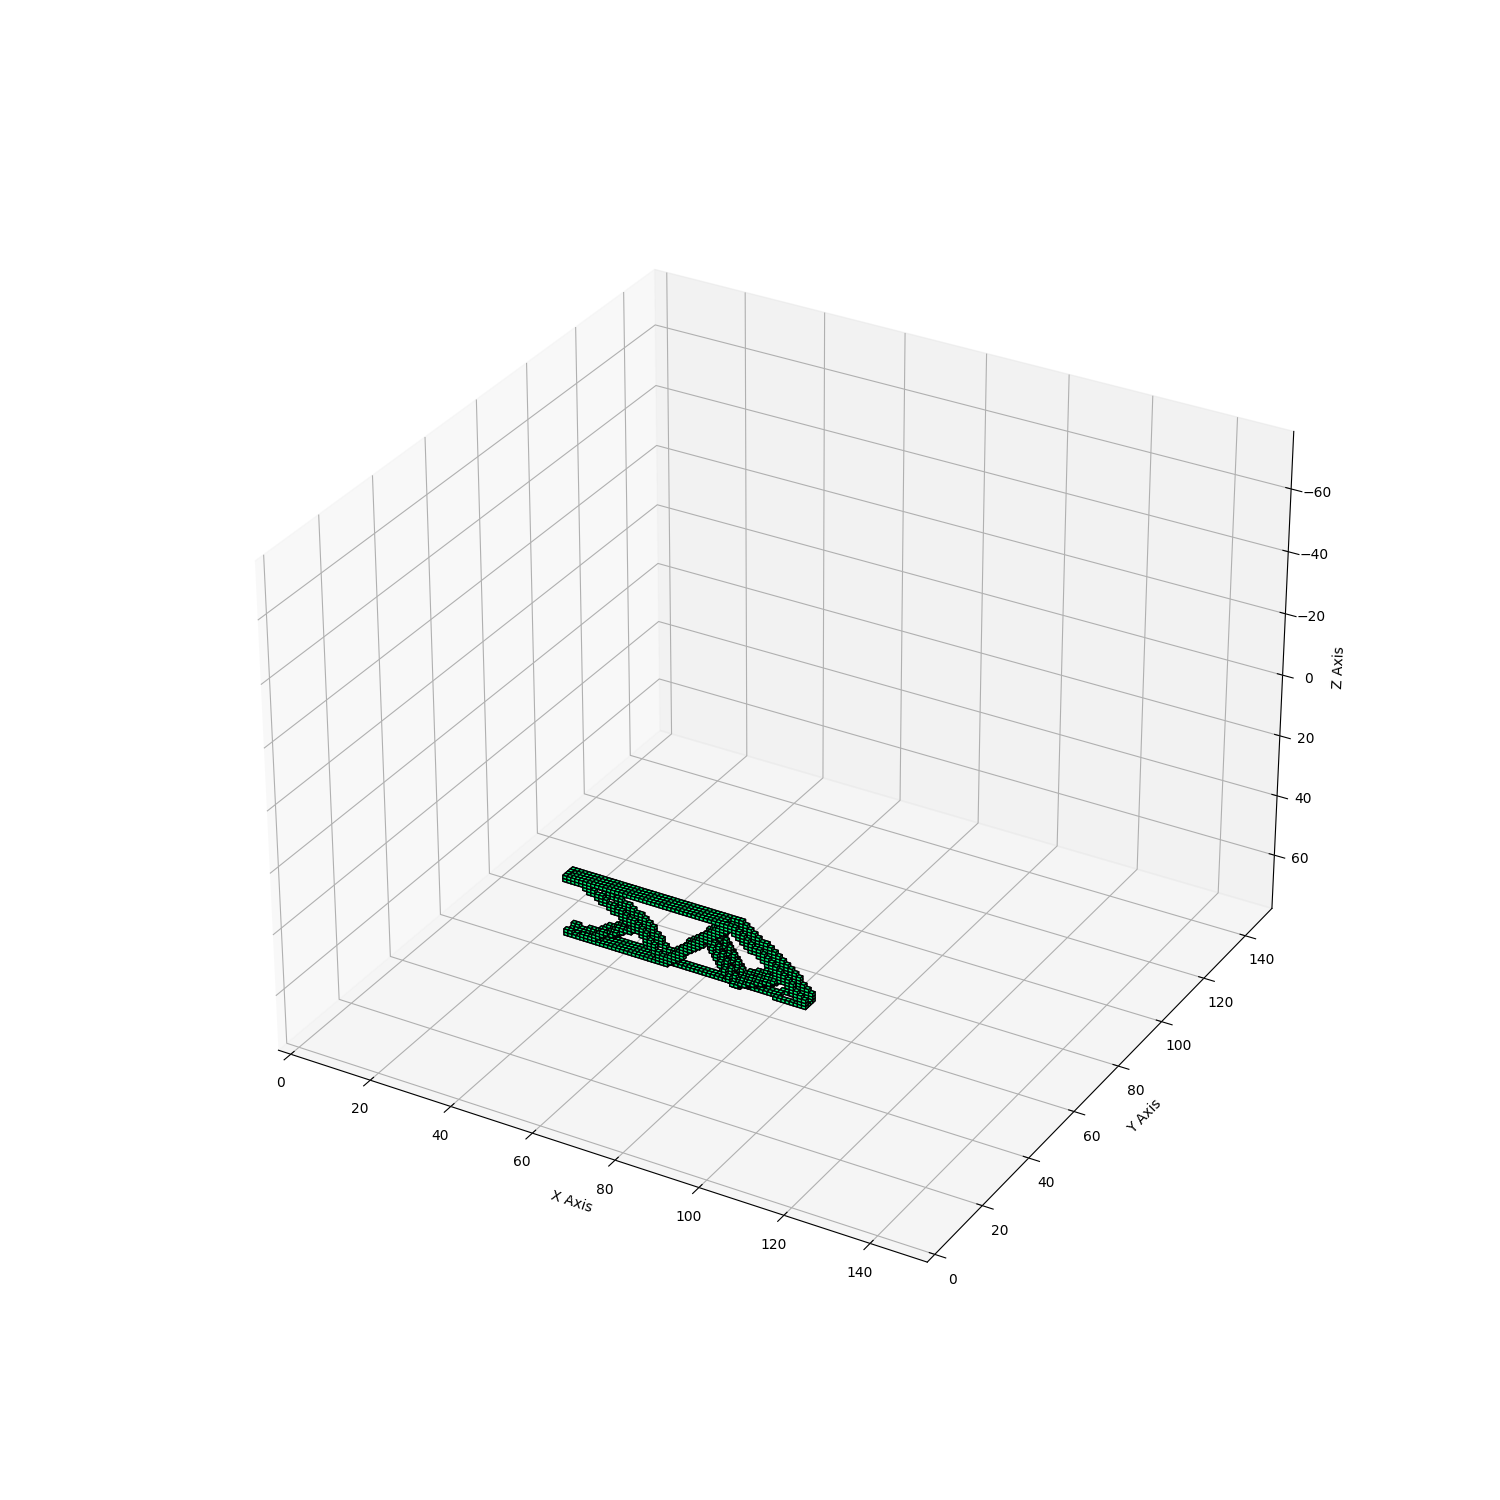

In [21]:
%matplotlib widget
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
data = io.loadmat('../Matlab_files/top3d_Model_3/top3d_MBB.mat')
data = data['ans']
data = np.array(data)
print('数据初始维度：',data.shape)
data = data.transpose(1, 2, 0)
print('数据调整后维度：',data.shape)#(x,z,y)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]):
            if data[i][j][k] > 0.5:
                data[i][j][k] = 1
            else:
                data[i][j][k] = 0

#数据尺寸扩展为标准尺寸
nelx, nely, nelz = 120, 120, 120
if (nelx - data.shape[0])%2 !=0:
    data = np.pad(data, ((1, 0), (0, 0), (0 ,0)))
if (nelz - data.shape[1])%2 !=0:
    data = np.pad(data, ((0, 0), (1, 0), (0 ,0)))
if (nely - data.shape[2])%2 !=0:
    data = np.pad(data, ((0, 0), (0, 0), (1 ,0)))
data_new = np.pad(data, (((nelx - data.shape[0])//2, (nelx - data.shape[0])//2),
                    ((nely - data.shape[1])//2, (nely - data.shape[1])//2),
                    ((nelz - data.shape[2])//2, (nelx - data.shape[2])//2)))
print('数据标准化后维度：',data_new.shape)
io.savemat('C:/Users/11573/Desktop/data/test2_0.mat',{'data':data_new})
# mycolormap = plt.get_cmap('winter')
# data_new_max = data_new.max()
# relativevalue = np.round(data_new / data_new_max, 1)
# colorsvalues = mycolormap(relativevalue)
# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(projection='3d')
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# ax.set_xlim(0, 150)
# ax.set_ylim(0, 150)
# ax.set_zlim(75, -75)
# ax.voxels(data_new, facecolors=colorsvalues,edgecolors = 'k', shade = False)

label_data = np.zeros((120, 120, 120))
face_voxel = []
search_list = np.zeros((1, 6, 3))
n = 0
t = 0
l = 0
for i in range(1,(data_new.shape[0]-1)):
    for j in range(1,(data_new.shape[1]-1)):
        for k in range(1,(data_new.shape[2]-1)):
            if data_new[i][j][k] !=0:
                face_voxel.append(data_new[i-1][j][k])
                # print('1:',face_voxel)
                face_voxel.append(data_new[i+1][j][k])
                # print('2:',face_voxel)
                face_voxel.append(data_new[i][j-1][k])
                # print('3:',face_voxel)
                face_voxel.append(data_new[i][j+1][k])
                # print('4:',face_voxel)
                face_voxel.append(data_new[i][j][k-1])
                # print('5:',face_voxel)
                face_voxel.append(data_new[i][j][k+1])
                # print('6:',face_voxel)
                sum_value = sum(face_voxel)
                # print('face_voxel:',face_voxel)
                
                if sum_value == 0 or sum_value == 1:
                    x, z, y = i, j ,k
                    print('i,j,k:',i, j, k)
                    label_data[i-2:i+2,j-2:j+2,k-2:k+2] = data_new[i-2:i+2,j-2:j+2,k-2:k+2]
                    face_voxel_index = np.array([[[x-1, z, y],
                                                 [x+1, z, y],
                                                 [x, z-1, y],
                                                 [x, z+1, y],
                                                 [x, z, y-1],
                                                 [x, z, y+1]]])
                    search_list = np.append(search_list, face_voxel_index, axis=0)
                    l += 1
                    
                face_voxel = []
                t += 1    
            n += 1
print('遍历了：',n,'次')
print('共有',t,'个非零元素')
print('共有',o,'个缺陷点')
print('search_list:',search_list)
print('search_list.shape:',search_list.shape)

for o in range(1,len(search_list)):
    repair_index = search_list[o]
    for w in range(6):
        point_index = repair_index[w]
        index_x = int(point_index[0])
        index_z = int(point_index[1])
        index_y = int(point_index[2])
        data_new[index_x, index_z, index_y] = 1


io.savemat('C:/Users/11573/Desktop/data/test1_2.mat',{'labeldata':label_data})
io.savemat('C:/Users/11573/Desktop/data/test1_repair2.mat',{'repairdata':data_new})
#绘制抓取的缺陷结构
# mycolormap = plt.get_cmap('winter')
# label_data_max = label_data.max()
# relativevalue = np.round(label_data / label_data_max, 1)
# colorsvalues = mycolormap(relativevalue)
# fig = plt.figure(figsize=(15, 15))
# ax = fig.add_subplot(projection='3d')
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# ax.set_xlim(0, 150)
# ax.set_ylim(0, 150)
# ax.set_zlim(75, -75)
# ax.voxels(label_data, facecolors=colorsvalues,edgecolors = 'k', shade = False)

mycolormap = plt.get_cmap('winter')
data_new_max = data_new.max()
relativevalue = np.round(data_new / data_new_max, 1)
colorsvalues = mycolormap(relativevalue)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(75, -75)
ax.voxels(data_new, facecolors=colorsvalues,edgecolors = 'k', shade = False)
#update

In [ ]:
import numpy as np
array = np.zeros((6, 1))
array[4] = 1
index = int(np.nonzero(array)[0])
print(index)
t = index * 3
print(t)
m = 3
n = m * 3
print(n)

In [ ]:
import numpy as np
search_list = np.zeros((1, 6, 3))
for i in range(1,3):
    for j in range(1,3):
        for k in range(1,3):
            face_voxel_index = np.array([[[i-1, j, k],
                                [i+1, j, k],
                                [i, j-1, k],
                                [i, j+1, k],
                                [i, j, k-1],
                                [i, j, k+1]]])
            # print('index:',face_voxel_index)
            search_list = np.append(search_list,face_voxel_index, axis = 0)
print(search_list.shape)
print(search_list)
index = search_list[1]
index_point = index[2]
index_i = index_point[0]
index_j = index_point[1]
index_k = index_point[2]
print('index:',index)
print('index_point:',index_point)
print('index_i:',index_i)
print('index_j:',index_j)
print('index_k:',index_k)

In [ ]:
data = io.loadmat('./top3dModel_1.mat')
data = data['data']
data = np.array(data)
print('数据初始维度：',data.shape)
data = data.transpose(1, 2, 0)
print('数据调整后维度：',data.shape)#(x,z,y)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]):
            if data[i][j][k] > 0.5:
                data[i][j][k] = 1
            else:
                data[i][j][k] = 0

#数据尺寸扩展为标准尺寸
nelx, nely, nelz = 120, 120, 120
if (nelx - data.shape[0])%2 !=0:
    data = np.pad(data, ((1, 0), (0, 0), (0 ,0)))
if (nelz - data.shape[1])%2 !=0:
    data = np.pad(data, ((0, 0), (1, 0), (0 ,0)))
if (nely - data.shape[2])%2 !=0:
    data = np.pad(data, ((0, 0), (0, 0), (1 ,0)))
data_new = np.pad(data, (((nelx - data.shape[0])//2, (nelx - data.shape[0])//2),
                    ((nely - data.shape[1])//2, (nely - data.shape[1])//2),
                    ((nelz - data.shape[2])//2, (nelx - data.shape[2])//2)))
print('数据标准化后维度：',data_new.shape)


label_data = np.zeros((120, 120, 120))
face_voxel = []
n = 0
for i in range(1,(data_new.shape[0]-1)):
    for j in range(1,(data_new.shape[1]-1)):
        for k in range(1,(data_new.shape[2]-1)):
            if data_new[i][j][k] !=0:
                face_voxel.append(data_new[i-1][j][k])
                print('1:',face_voxel)
                face_voxel.append(data_new[i+1][j][k])
                print('2:',face_voxel)
                face_voxel.append(data_new[i][j-1][k])
                print('3:',face_voxel)
                face_voxel.append(data_new[i][j+1][k])
                print('4:',face_voxel)
                face_voxel.append(data_new[i][j][k-1])
                print('5:',face_voxel)
                face_voxel.append(data_new[i][j][k+1])
                print('6:',face_voxel)
                sum_value = sum(face_voxel)
                print('face_voxel:',face_voxel)

                if sum_value == 0 or sum_value == 1:
                    print('i:,j:,k:',i, j, k)
                    # label_data[i-2:i+2,j-2:j+2,k-2:k+2] = data_new[i-2:i+2,j-2:j+2,k-2:k+2]
                    # data_new[i-1, j-1, k+1] = 1
                    data_new[i, j, k-1] = 1

                face_voxel = []
            n += 1
print('遍历了：',n,'次')